In [2]:
%pip install tensorflow-io[tensorflow]

INFO: pip is looking at multiple versions of tensorflow-io[tensorflow] to determine which version is compatible with other requirements. This could take a while.
  Using cached tensorflow_io-0.30.0-cp311-cp311-win_amd64.whl.metadata (14 kB)
  Using cached tensorflow_io_gcs_filesystem-0.30.0-cp311-cp311-win_amd64.whl.metadata (14 kB)
  Using cached tensorflow_io-0.29.0-cp311-cp311-win_amd64.whl.metadata (14 kB)
  Using cached tensorflow_io_gcs_filesystem-0.29.0-cp311-cp311-win_amd64.whl.metadata (14 kB)

The conflict is caused by:
    tensorflow-io[tensorflow] 0.31.0 depends on tensorflow<2.12.0 and >=2.11.0; extra == "tensorflow"
    tensorflow-io[tensorflow] 0.30.0 depends on tensorflow<2.12.0 and >=2.11.0; extra == "tensorflow"
    tensorflow-io[tensorflow] 0.29.0 depends on tensorflow<2.12.0 and >=2.11.0; extra == "tensorflow"

To fix this you could try to:
1. loosen the range of package versions you've specified
2. remove package versions to allow pip to attempt to solve the depend

ERROR: Cannot install tensorflow-io[tensorflow]==0.29.0, tensorflow-io[tensorflow]==0.30.0 and tensorflow-io[tensorflow]==0.31.0 because these package versions have conflicting dependencies.
ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conflicts


In [3]:
import mimetypes
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf



C:\Users\MARIYA BRUNO A\AppData\Local\Temp\ipykernel_49404\2157079456.py:4: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [4]:
# NEG = "/content/drive/MyDrive/Classroom/sickle/Negative/New_Clear"
# POS = "/content/drive/MyDrive/Classroom/sickle/Positive/Unlabelled"

data_dir = r"D:\hi nana project\Sickle-Cell-anemia-detection-using-Efficietnet-based-CNN-architecture\datast"


In [5]:
# Check available directories
os.listdir(os.path.join(data_dir))

['normal cell', 'sickle cell']

In [6]:
img = cv2.imread(os.path.join(data_dir, 'sickle cell', '1.jpg' ))

In [7]:
img.shape

(2853, 2775, 3)

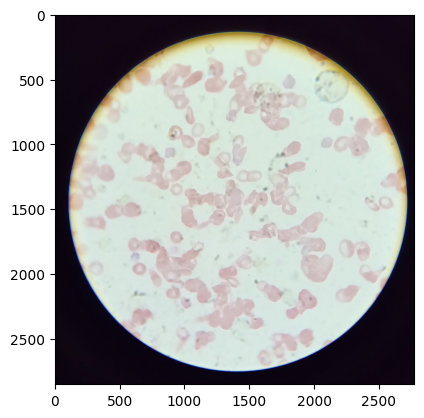

In [8]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [9]:
type(img)

numpy.ndarray

### **LOADING THE DATASET**

In [10]:
import tensorflow as tf
import tensorflow_io as tfio


In [11]:
import numpy as np

In [12]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 569 files belonging to 2 classes.


In [13]:
data_iterator = data.as_numpy_iterator()

In [14]:
batch = data_iterator.next()

In [15]:
batch[0].shape

(32, 256, 256, 3)

In [16]:
batch[1]

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0], dtype=int32)

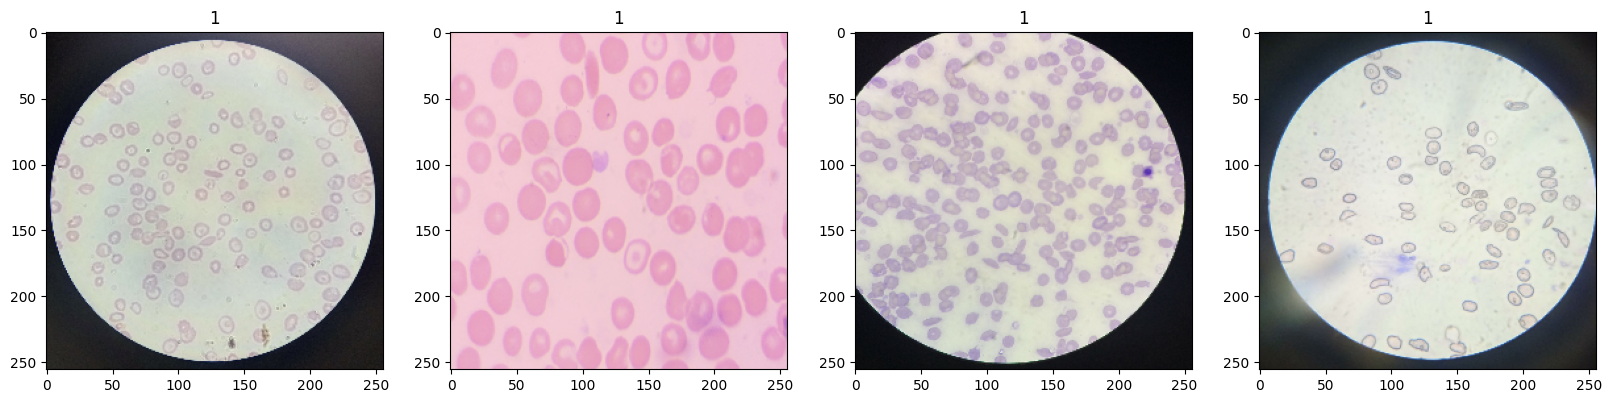

In [17]:
#0 is normal cell
#1 is sickel cell
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

### **SCLAING**

In [18]:


# Normalize images (Scaling pixel values between 0-1)
data = data.map(lambda x, y: (x / 255.0, y)) 


In [19]:
data.as_numpy_iterator().next()

(array([[[[0.05182627, 0.05182627, 0.04588264],
          [0.06139706, 0.06531863, 0.04571078],
          [0.04996936, 0.05389093, 0.03428309],
          ...,
          [0.04941646, 0.05725959, 0.05333802],
          [0.02399855, 0.03184168, 0.02007698],
          [0.01558239, 0.03519024, 0.01950396]],
 
         [[0.05585172, 0.05585172, 0.04800858],
          [0.07378935, 0.07771092, 0.05810307],
          [0.05726534, 0.06118691, 0.04157906],
          ...,
          [0.03566176, 0.0435049 , 0.03958333],
          [0.02316177, 0.03884804, 0.03492647],
          [0.02674106, 0.04242733, 0.03850576]],
 
         [[0.04816464, 0.04816464, 0.0403215 ],
          [0.06086761, 0.06478918, 0.04518133],
          [0.05490914, 0.0691861 , 0.04743365],
          ...,
          [0.02435662, 0.03219976, 0.02827819],
          [0.03578001, 0.04362314, 0.03185844],
          [0.02567402, 0.03351716, 0.02175245]],
 
         ...,
 
         [[0.06920812, 0.06528655, 0.04960028],
          [0.07509

### **SPLITTING**

In [20]:
len(data)

18

In [21]:
# Split dataset into train, validation, and test sets
train_size = int(len(data) * 0.7)
val_size = int(len(data) * 0.2)
test_size = len(data) - (train_size + val_size)  # Ensures proper partitioning


In [22]:
train_size + val_size + test_size

18

In [23]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [24]:
print(len(train))
print(len(val))
len(test)

12
3


3

### **TRAIN**

In [25]:
# Import necessary layers



import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D, Input, Concatenate
from tensorflow.keras.models import Model



In [26]:


# Define Input Layer
input_layer = Input(shape=(256, 256, 3))

In [27]:
# ✅ 1️⃣ Custom CNN Branch (Feature Extraction)

x = Conv2D(16, (3, 3), activation='relu', padding="same")(input_layer)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding="same")(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding="same")(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

In [28]:
# Fully Connected Layers
x = Flatten()(x)  
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)  # Prevent overfitting

In [29]:



# ✅ 2️⃣ Transfer Learning Branch (EfficientNetB0)
efficientnet_base = EfficientNetB0(weights='imagenet', include_top=False, input_tensor=input_layer)
efficientnet_base.trainable = False  # Freeze Pretrained Weights

In [30]:
num_classes = 2  # Two categories: Sickle Cell & Normal Cell

# Convert EfficientNet output to Dense Layer
x_effnet = GlobalAveragePooling2D()(efficientnet_base.output)  
x_effnet = Dense(128, activation='relu')(x_effnet)

# Output layer
output_layer = Dense(num_classes, activation='softmax')(x_effnet)

In [31]:


# ✅ 3️⃣ Merge CNN & EfficientNetB0 Outputs
merged = Concatenate()([x, x_effnet])
merged = Dense(256, activation='relu')(merged)
merged = Dropout(0.5)(merged)

In [32]:
# ✅ 4️⃣ Output Layer (Binary Classification)
output_layer = Dense(1, activation='sigmoid')(merged)

In [33]:
# ✅ 5️⃣ Create Model
model = Model(inputs=input_layer, outputs=output_layer)

In [34]:
# ✅ 6️⃣ Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [35]:
# ✅ 7️⃣ Display Model Summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 256, 256,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 256, 256,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 256, 256,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 257, 257,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 128, 128,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 128, 128,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 128, 128,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 128, 128,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 128, 128,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 128, 128,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 128, 128,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 128, 128,  │        512 │ block1a_se_excit

 Total params: 12,691,908 (48.42 MB)

 Trainable params: 8,642,337 (32.97 MB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [36]:
# TensorBoard Callback
import tensorflow as tf
# ✅ Train the Model
logdir = r"D:\hi nana\Sickle-Cell-anemia-detection-using-Alexnet-based-CNN-architecture\logs"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [37]:


def train_step(x, y):
    model.train_on_batch(x, y)

for x, y in train:
    train_step(x, y)


hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])




Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.7401 - loss: 0.5957 - val_accuracy: 0.7292 - val_loss: 0.5832
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.7149 - loss: 0.6003 - val_accuracy: 0.6875 - val_loss: 0.7161
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 12s 926ms/step - accuracy: 0.7277 - loss: 0.6215 - val_accuracy: 0.8125 - val_loss: 0.5276
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 12s 912ms/step - accuracy: 0.7375 - loss: 0.5753 - val_accuracy: 0.7917 - val_loss: 0.5384
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 12s 935ms/step - accuracy: 0.7732 - loss: 0.5478 - val_accuracy: 0.6771 - val_loss: 0.6062
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 12s 913ms/step - accuracy: 0.7314 - loss: 0.5594 - val_accuracy: 0.7188 - val_loss: 0.5614
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 12s 916ms/step - accuracy: 0.7059 - loss: 0.5514 - val_accuracy: 0.8438 - val_loss: 0.5155
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 12s 905ms/step - accuracy: 0.7218 - loss: 0.5173 - val_accuracy: 

In [38]:
# Model Evaluation using Validation Data
model.evaluate(val)




3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 621ms/step - accuracy: 0.9648 - loss: 0.1834


[0.21457581222057343, 0.9375]

In [39]:
import keras

keras.models.save_model(model, "sickle_cell_detection_model.keras")



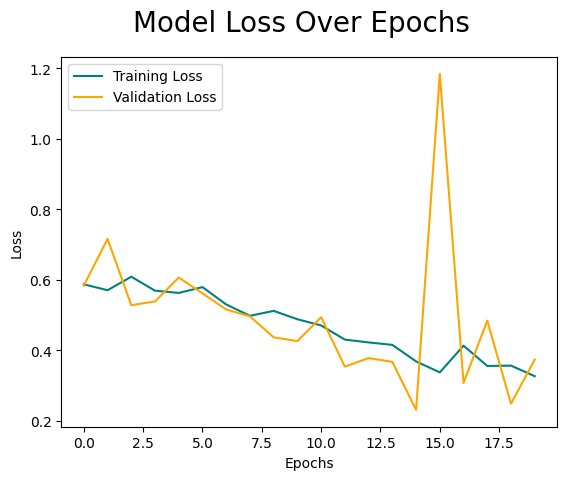

In [40]:
# ✅ Plot Loss Over Epochs
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='Training Loss')
plt.plot(hist.history['val_loss'], color='orange', label='Validation Loss')
fig.suptitle('Model Loss Over Epochs', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="upper left")
plt.show()


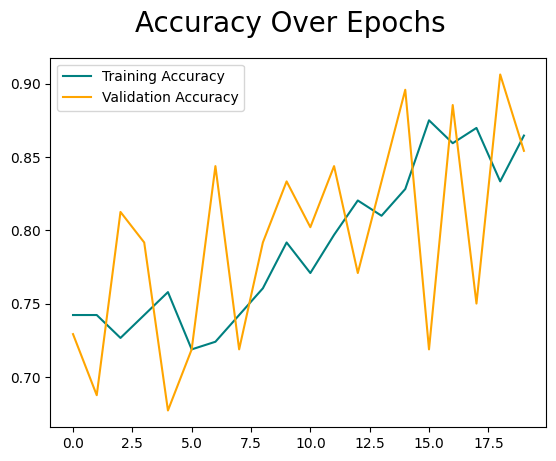

In [41]:
# ✅ Plot Accuracy Over Epochs
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='Validation Accuracy')
fig.suptitle('Accuracy Over Epochs', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [1]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import numpy as np

# Evaluate model on test data
test_loss, test_accuracy = model.evaluate(test)

# Get predictions
y_pred = model.predict(test)
y_pred_classes = (y_pred > 0.5).astype(int)  # ✅ Correct for binary classification

# Extract true labels correctly
y_true = np.concatenate([y.numpy() for x, y in test], axis=0)

# Compute metrics
precision = precision_score(y_true, y_pred_classes, average='weighted', zero_division=1)
recall = recall_score(y_true, y_pred_classes, average='weighted', zero_division=1)
f1 = f1_score(y_true, y_pred_classes, average='weighted', zero_division=1)

# Print results
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
#print(f"Precision: {precision * 100:.2f}%")
#print(f"Recall: {recall * 100:.2f}%")
#print(f"F1-Score: {f1 * 100:.2f}%")


NameError: name 'model' is not defined

### **TEST**

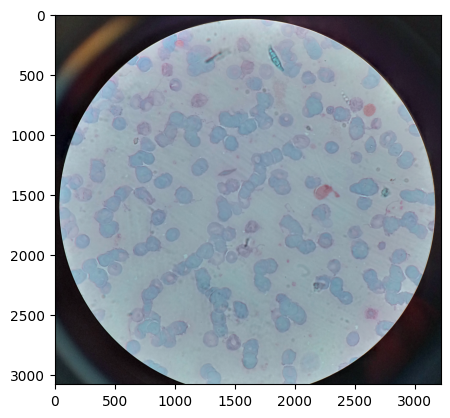

In [43]:
img = cv2.imread(r'D:\hi nana project\Sickle-Cell-anemia-detection-using-Efficietnet-based-CNN-architecture\datast\sickle cell\16.jpg')

plt.imshow(img)
plt.show()

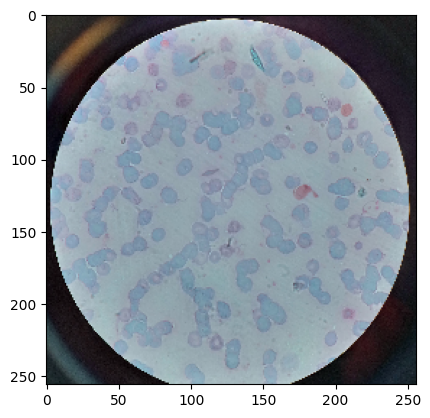

In [44]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [45]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


In [46]:
yhat

array([[0.66191375]], dtype=float32)

In [47]:
print(yhat)

[[0.66191375]]


In [48]:
# ✅ Function for Predictions
def predict_sickle_cell(image_path, model):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (256, 256))
    img = img / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)

    prediction = model.predict(img)[0][0]  # Get single output value

    # Convert to percentage
    sickle_percentage = round(prediction * 100, 2)
    normal_percentage = round(100 - sickle_percentage, 2)

    return sickle_percentage, normal_percentage

In [49]:
# ✅ Example Usage
sickle, normal = predict_sickle_cell(
    r"D:\hi nana project\Sickle-Cell-anemia-detection-using-Efficietnet-based-CNN-architecture\datast\sickle cell\17.jpg",
    model
)
print(f"Sickle Cell: {sickle}% | Normal Cell: {normal}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
Sickle Cell: 99.56999969482422% | Normal Cell: 0.4300000071525574%


In [50]:

# ✅ File Upload Handling
UPLOAD_FOLDER = "uploads/"
os.makedirs(UPLOAD_FOLDER, exist_ok=True)  # Create folder if not exists

def save_uploaded_file(uploaded_file):
    file_path = os.path.join(UPLOAD_FOLDER, uploaded_file.name)
    with open(file_path, "wb") as f:
        f.write(uploaded_file.getbuffer())
    return file_path